<a href="https://colab.research.google.com/github/Samin-Sadaf7/Book-of-LLMs/blob/main/HandsOnLLM_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bertopic datasets openai datamapplot

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.2 MB/s eta 0:00:00
  Creat

In [ ]:
#Load data from Hugging Face
from datasets import load_dataset
dataset = load_dataset("maartengr/arxiv_nlp")["train"]

In [ ]:
#Extract metadata
abstracts = dataset["Abstracts"]
titles = dataset["Titles"]

#Three step process for Text Clustering:
1. Convert the input documents into embeddings using embedding model
2. Reduce the dimensionality of embeddings with a dimensionality reduction model
3. Find groups of semantically similar documents with a cluster model

In [ ]:
from sentence_transformers import SentenceTransformer

#Create an embedding for each abstract
embedding_model = SentenceTransformer("thenlper/gte-small")
embeddings = embedding_model.encode(abstracts, show_progress_bar=True)

Batches:   0%|          | 0/1405 [00:00<?, ?it/s]

In [ ]:
#Dimensions of the resulting embeddings
embeddings.shape

(44949, 384)

In [ ]:
#Using UMAP(Uniform Manifold Approximation and Projection) for dimensionality reduction
from umap import UMAP
#We reduce the input dimension from 384 to 5
umap_model = UMAP(
    n_components = 5,
    min_dist = 0.0,
    metric = 'cosine',
    random_state = 42
)
reduced_embeddings = umap_model.fit_transform(embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
"""Instrad of using k means clustering where it is required to have a set of clusters to be generated
  We are going to use a density based clustering algorithms which does not force a data point to be part of a cluster
  Also it freely calculated the number of cluster"""
#A common clustering based algorithm is HDBSCAN(Heirarchical Density Based Spatial Clustering of Applications with Noise)
# It is heirarchial version of DBSCAN that allows for dense clusters to be found without explicitly mention the number of clusters
# It is also efficient to find outliers which do not belong to any clusters, outliers won't be forced to be a part of any clusters

from hdbscan import HDBSCAN
# We fit the model and extract the clusters
hdbscan_model = HDBSCAN(
    min_cluster_size =50,
    metric = "euclidean",
    cluster_selection_method ="eom"
).fit(reduced_embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
clusters = hdbscan_model.labels_
#Number of clusters we generated
print(f"Number of clusters: {len(set(clusters))}")

Number of clusters: 153


In [ ]:
#Inspecting the clusters
import numpy as np
#Print first three documents in cluster 3
cluster = 3
for index in np.where(clusters==cluster)[0][:3]:
  print(abstracts[index][:300]+"...\n")

  We report on work in progress on extracting lexical simplifications (e.g.,
"collaborate" -> "work together"), focusing on utilizing edit histories in
Simple English Wikipedia for this task. We consider two main approaches: (1)
deriving simplification probabilities via an edit model that accounts f...

  Overall, the two main contributions of this work include the application of
sentence simplification to association extraction as described above, and the
use of distributional semantics for concept extraction. The proposed work on
concept extraction amalgamates for the first time two diverse resea...

  Lexical substitutes have found use in areas such as paraphrasing, text
simplification, machine translation, word sense disambiguation, and part of
speech induction. However the computational complexity of accurately
identifying the most likely substitutes for a word has made large scale
experiment...



In [ ]:
import pandas as pd
#Reduce 384 dimensions into two dimensions for better visualizations
reduced_embd = UMAP(
    n_components = 2,
    min_dist = 0.0,
    metric ="cosine",
    random_state = 42
).fit_transform(embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
#Create dataframes
df = pd.DataFrame(reduced_embd, columns=["x","y"])
df["title"] = titles
df["cluster"] = [str(c) for c in clusters]

In [ ]:
#Select outliers and non outliers clusters
clusters_df = df.loc[df.cluster != "-1", :]
outliers_df = df.loc[df.cluster == "-1", :]

(-7.778345727920533,
 10.878833436965943,
 -1.711702972650528,
 16.388065367937088)

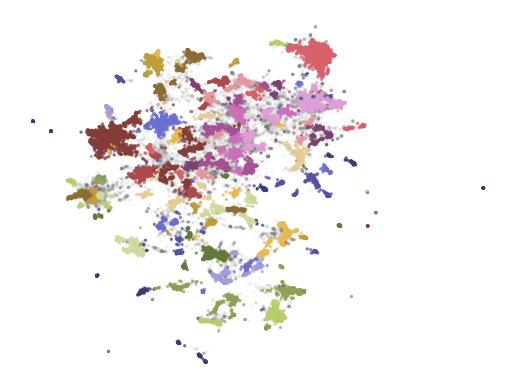

In [ ]:
import matplotlib.pyplot as plt
#Plot outliers and non outliers separately
plt.scatter(outliers_df.x, outliers_df.y, alpha=0.05, s=2, c="gray")
plt.scatter(clusters_df.x, clusters_df.y, c=clusters_df.cluster.astype(int), alpha=0.6, s=2, cmap="tab20b")
plt.axis("off")

#BERTopic: A Modular Topic Modeling Framework
1. Going through the above Process to get to the clusters
2. Use Bag of Words along with TF-IDF to get the keywords for topics
3. Create a class based bag of words
4. Weigh terms

In [ ]:
from bertopic import BERTopic
#Train our model woth previously defined models
topic_model = BERTopic(
    embedding_model = embedding_model,
    umap_model = umap_model,
    hdbscan_model = hdbscan_model,
    verbose = True
).fit(abstracts, embeddings)

2025-01-04 14:43:41,369 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-01-04 14:44:50,326 - BERTopic - Dimensionality - Completed ✓
2025-01-04 14:44:50,328 - BERTopic - Cluster - Start clustering the reduced embeddings
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be

In [ ]:
topic_model.get_topic_info()

Topic  Count                                           Name  \
0       -1  14462                               -1_the_of_and_to   
1        0   2241                 0_question_questions_qa_answer   
2        1   2098                   1_speech_asr_recognition_end   
3        2    903               2_image_visual_multimodal_images   
4        3    887  3_summarization_summaries_summary_abstractive   
..     ...    ...                                            ...   
148    147     54           147_counseling_mental_therapy_health   
149    148     53                     148_chatgpt_its_openai_has   
150    149     52                149_mixed_code_sentiment_mixing   
151    150     51   150_diffusion_generation_autoregressive_text   
152    151     51         151_coherence_discourse_paragraph_text   

                                        Representation  \
0    [the, of, and, to, in, we, for, that, language...   
1    [question, questions, qa, answer, answering, a...   
2    [speech, asr, recognition, end, acoustic, audi...   
3    [image, visual, multimodal, images, vision, mo...   
4    [summarization, summaries, summary, abstractiv...   
..                                                 ...   
148  [counseling, mental, therapy, health, psychoth...   
149  [chatgpt, its, openai, has, it, tasks, capabil...   
150  [mixed, code, sentiment, mixing, english, anal...   
151  [diffusion, generation, autoregressive, text, ...   
152  [coherence, discourse, paragraph, text, cohesi...   

                                   Representative_Docs  
0    [  Cross-lingual text classification aims at t...  
1    [  Question generation (QG) attempts to solve ...  
2    [  End-to-end models have achieved impressive ...  
3    [  In this paper we propose a model to learn m...  
4    [  We present a novel divide-and-conquer metho...  
..                                                 ...  
148  [  Mental health care poses an increasingly se...  
149  [  Over the last few years, large language mod...  
150  [  In today's interconnected and multilingual ...  
151  [  Diffusion models have achieved great succes...  
152  [  While there has been significant progress t...  

[153 rows x 5 columns]

In [ ]:
topic_model.get_topic(0)

[('question', 0.021262463291547223),
 ('questions', 0.015866039067984204),
 ('qa', 0.015830640927795868),
 ('answer', 0.015787698152510205),
 ('answering', 0.014859992848422435),
 ('answers', 0.00992918704536005),
 ('retrieval', 0.009497931820914705),
 ('comprehension', 0.007719047154229789),
 ('reading', 0.007175282051339653),
 ('knowledge', 0.0063049421989358)]

In [ ]:
topic_model.find_topics("topic modeling")

([22, -1, 50, 38, 84],
 [0.95448655, 0.91218555, 0.9067658, 0.9051957, 0.9026561])

In [ ]:
topic_model.get_topic(22)

[('topic', 0.06782148231481569),
 ('topics', 0.03509097163093816),
 ('lda', 0.0162350543969945),
 ('latent', 0.013482620892138605),
 ('document', 0.01258276852968132),
 ('documents', 0.012463820004375148),
 ('modeling', 0.011571581804609226),
 ('dirichlet', 0.009901318233964887),
 ('word', 0.00852094200971816),
 ('allocation', 0.007792539607690728)]

In [ ]:
topic_model.topics_[titles.index('BERTopic: Neural topic modeling with a class-based TF-IDF procedure')]

22

In [ ]:
#Visualize topics and documents
fig = topic_model.visualize_documents(
    titles,
    reduced_embeddings=reduced_embeddings,
    width=1200,
    hide_annotations=True
)
#Update fonts of legend for easier visualization
fig.update_layout(font=dict(size=16))

In [32]:
#visualze barchart with ranked keywords
topic_model.visualize_barchart()
#Visualize realtionships between topics
topic_model.visualize_heatmap(n_clusters=30)
#Visualize the potential hierarchical structure of topics
topic_model.visualize_hierarchy()

In [33]:
#Save our original representations
from copy import deepcopy
original_topics = deepcopy(topic_model.topic_representations_)

In [34]:
def topic_differences(model, original_topics, nr_topics =5):
  """Show the differences in topic representations between two models"""
  df = pd.DataFrame(columns=["Topic", "Original", "Updated"])
  for topic in range(nr_topics):
    #Extract top 5 words per topic per model
    og_words = " | ".join(list(zip(*original_topics[topic]))[0][:5])
    new_words = " | ".join(list(zip(*model.topic_representations_[topic]))[0][:5])
    df.loc[len(df)] = [topic, og_words, new_words]
  return df

In [35]:
from bertopic.representation import KeyBERTInspired
#Update our topic representations using KeyBERTInspired
representation_model = KeyBERTInspired()
topic_model.update_topics(abstracts, representation_model=representation_model)

In [36]:
#Show topic differences
topic_differences(topic_model, original_topics=original_topics)

Topic                                           Original  \
0      0     question | questions | qa | answer | answering   
1      1        speech | asr | recognition | end | acoustic   
2      2      image | visual | multimodal | images | vision   
3      3  summarization | summaries | summary | abstract...   
4      4        translation | nmt | machine | neural | bleu   

                                             Updated  
0  answering | questions | answer | question | co...  
1  phonetic | encoder | language | speech | trans...  
2  captioning | multimodal | visual | visually | ...  
3  summarization | summarizers | summaries | summ...  
4  translation | translate | translated | transla...

In [38]:
from bertopic.representation import MaximalMarginalRelevance
#Update our topic representations to MaximalMarginalRelevance
representation_model = MaximalMarginalRelevance(diversity=0.2)
topic_model.update_topics(
    abstracts,
    representation_model=representation_model
)

In [39]:
#show topic representations
topic_differences(topic_model, original_topics=original_topics)

Topic                                           Original  \
0      0     question | questions | qa | answer | answering   
1      1        speech | asr | recognition | end | acoustic   
2      2      image | visual | multimodal | images | vision   
3      3  summarization | summaries | summary | abstract...   
4      4        translation | nmt | machine | neural | bleu   

                                             Updated  
0  questions | answering | retrieval | comprehens...  
1           speech | asr | audio | model | automatic  
2       visual | multimodal | modal | captions | vqa  
3  summarization | summaries | abstractive | eval...  
4  translation | nmt | neural | parallel | multil...